## An Exploration of the Bike Share Kaggle Dataset

In this document, I will show you how to do some basic exploration and cleaning of the kaggle Bike share dataset.  The data is checked into the repository under `DataScience16/datasets/kaggle_bikeshare_train.csv`.  The code here relies on you running this notebook from the `DataScience16/exercises` directory.

First, we will read the data into a Pandas dataframe.

In [2]:
import pandas as pd

data = pd.read_csv('../../datasets/kaggle_bikeshare_train.csv')

print data.head()
print data.describe()

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81          0       3          13     16  
1        80          0       8          32     40  
2        80          0       5          27     32  
3        75          0       3          10     13  
4        75          0       0           1      1  
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427  

### Checking for Missing values

It's always a good idea to check form missing values in your data.  To do this we will use the pandas isnull() function.

In [3]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Validating our Recodes

The next thing to do is to make sure we understand some of recodes in the data.  We know that we are trying to predict count which is presumably a combination of casual and registered.  Let's check this hypothesis.  Note: this is more about checking our own understanding rather than checking to validity of the data (since we can be reasonably confident that it is correct).  However, you could imagine this would be a good unit test for recodes that you created yourself.  In fact, this unit test would serve as a guide for anyone else reading your code as to what exactly the recode means.

In [4]:
((data.registered+data.casual) == data['count']).mean()

1.0

You may have noticed we used the dictionary notation to lookup `count` whereas we used the dot-notation to lookup registered and casual.  The reason for this is that is a method of the DataFrame class, and thus it is ambiguous which we are referring to (the column or the method).

In [5]:
print type(data.registered)
print type(data['registered'])
print type(data.count)
print type(data['count'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<type 'instancemethod'>
<class 'pandas.core.series.Series'>


### Exploring Basic Properties of the Data

Next, we will look at each of the variables in some more detail.

/home/pruvolo/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


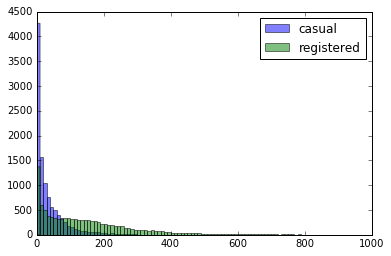

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(data.casual, bins=np.arange(0,1000,10), alpha=0.5)
plt.hist(data.registered, bins=np.arange(0,1000,10), alpha=0.5)
plt.legend(['casual','registered'])
plt.show()

### ThinkPlot

Now we wil try the same thing using ThinkPlot

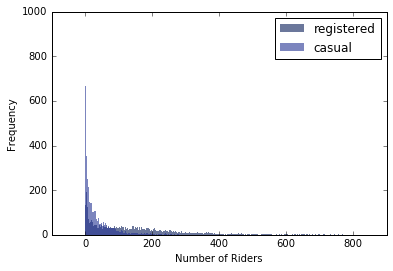

In [7]:
import sys
sys.path.append('../../ThinkStats2')
import thinkplot
import thinkstats2

hist = thinkstats2.Hist(data.registered, label='registered')
thinkplot.Hist(hist, width=1)
hist = thinkstats2.Hist(data.casual, label='casual')
thinkplot.Hist(hist, width=1)
thinkplot.Show(xlabel="Number of Riders", ylabel="Frequency")

## Investigating Relationship Between Ridership and Other Factors

We will investigate some different methods for determining how the value of 1 factor affects the value fo another.  As a first example, let's determine the effect that whether or not it is a working day has on the ridership of both casual and registered riders.

First, let's try the loop-based method.

In [8]:
import time
start_time = time.time()
d = {0 : [], 1: []}
for i in data.index:
    d[data.loc[i, 'workingday']].append(data.loc[i, 'count'])
print sum(d[0])/float(len(d[0]))
print sum(d[1])/float(len(d[1]))
print "elapsed time", time.time() - start_time

188.50662061
193.011872639
elapsed time 4.90006303787


Next, we'll select a subset of the cells of the data frame and use mean to figure things out.

In [9]:
start_time = time.time()
print data[data.workingday == 0]['count'].mean()
print data[data.workingday == 1]['count'].mean()
print "elapsed time", time.time() - start_time

188.50662061
193.011872639
elapsed time 0.00517582893372


Finally, we'll use the groupby operation to do this in an even more convenient fashion.

In [10]:
start_time = time.time()
data.groupby('workingday')['count'].mean()
print "elapsed time", time.time() - start_time

elapsed time 0.00187110900879


In [11]:
data.groupby('holiday').mean()

,season,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
holiday,,,,,,,,,,
0,2.500993,0.700898,1.419196,20.230466,23.662662,61.880095,12.787623,35.646714,156.094941,191.741655
1,2.697749,0.000000,1.392283,20.244244,23.397395,62.102894,13.199711,48.781350,137.096463,185.877814


In [12]:
data.groupby('season').mean()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,
1,0.026433,0.680566,1.424423,12.530491,15.228956,56.297841,14.636978,15.489576,100.853686,116.343261
2,0.017563,0.692645,1.422978,22.823483,26.647098,60.852909,13.405607,47.446762,167.804610,215.251372
3,0.035126,0.675082,1.366630,28.789111,32.540783,64.123674,11.508862,52.220271,182.196853,234.417124
4,0.035113,0.675201,1.459766,16.649239,20.059909,66.173738,11.678147,28.580834,170.407462,198.988296


In [13]:
data.groupby(['season','workingday']).mean()

holiday   weather       temp      atemp   humidity  \
season workingday                                                        
1      0           0.082751  1.446387  12.344918  14.907646  56.988345   
       1           0.000000  1.414114  12.617593  15.379768  55.973742   
2      0           0.057143  1.388095  22.742310  26.536792  61.114286   
       1           0.000000  1.438457  22.859503  26.696046  60.736926   
3      0           0.108108  1.369369  28.675068  32.735743  65.875000   
       1           0.000000  1.365312  28.844000  32.446949  63.280759   
4      0           0.108108  1.346847  15.696351  19.106227  64.557432   
       1           0.000000  1.514085  17.107616  20.518667  66.951246   

                   windspeed     casual  registered       count  
season workingday                                                
1      0           15.776540  26.615385   79.111888  105.727273  
       1           14.102107  10.267505  111.058534  121.326039  
2      0           11.556256  79.867857  142.825000  222.692857  
       1           14.226238  33.060222  178.889065  211.949287  
3      0           11.862931  82.248874  150.271396  232.520270  
       1           11.338448  37.767480  197.562602  235.330081  
4      0           11.411330  48.507883  143.629505  192.137387  
       1           11.806496  18.995125  183.288732  202.283857

In [14]:
data.groupby(['season',data.atemp>20]).mean()

holiday  workingday   weather       temp      atemp   humidity  \
season atemp                                                                    
1      False  0.034809    0.687220  1.439085  10.145410  12.404886  57.071109   
       True   0.001481    0.660741  1.380741  19.636267  23.642593  53.994074   
2      False  0.016835    0.629630  1.528620  13.807475  16.495000  68.784512   
       True   0.017652    0.700328  1.410099  23.922726  27.884854  59.885878   
3      False  0.000000    1.000000  1.346154  28.573846  12.702692  58.346154   
       True   0.035464    0.671962  1.366827  28.791178  32.731322  64.179165   
4      False  0.027653    0.624813  1.395366  12.710613  15.604593  64.970105   
       True   0.042264    0.723496  1.521490  20.424226  24.330118  67.327364   

              windspeed     casual  registered       count  
season atemp                                                
1      False  13.759171   7.768772   82.475883   90.244654  
       True   17.252192  38.491852  155.605926  194.097778  
2      False  14.320246  13.407407   75.882155   89.289562  
       True   13.294093  51.596880  179.011905  230.608785  
3      False  15.385262  57.346154  222.384615  279.730769  
       True   11.471630  52.171038  181.810861  233.981899  
4      False  11.120022  14.521674  143.242900  157.764574  
       True   12.213083  42.055874  196.443410  238.499284

## Recodes

Next, we will parse through the datetime field to create some recodes that will allow us to access various fields datetime.  A typical entry in the datetime columns looks like this: `2011-04-05 13:00:00`.  Next, we will create a function that converts this string into a tuple of integers in the format year, month, day, hour.=

In [15]:
def parse_date(datetime):
    """ Convert a date in YYYY-MM-DD HH:MM:SS to a tuple
        containing year, month, day, and hours each expressed
        as an integer.

        >>> parse_date("2014-04-05 14:00:00")
        (2014, 4, 5, 14)
    """
    return int(datetime[0:4]), int(datetime[5:7]), int(datetime[8:10]), int(datetime[11:13])

import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

Next, we will apply our function to create some new columns in our data frame.

In [16]:
years = []
months = []
days = []
hours = []
dates = []

for d in data.datetime:
    year, month, day, hour = parse_date(d)
    years.append(year)
    months.append(month)
    days.append(day)
    hours.append(hour)
    dates.append(d[0:10])

data['year'] = years
data['month'] = months
data['day'] = days
data['hour'] = hours
data['date'] = dates

As a final step, we will use our recodes to create some time series plots.

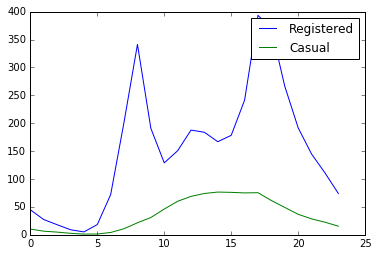

In [19]:
value_counts = data.date.value_counts()

mask = [value_counts[row.date] == 24 for index, row in data.iterrows()]
only_full_dates = data[mask]

plt.plot(data.groupby('hour').registered.mean())
plt.plot(data.groupby('hour').casual.mean())
plt.legend(['Registered', 'Casual'])

### Next, go play around!  See what you can find